<a href="https://colab.research.google.com/github/jovian-explorer/Short-Projects/blob/main/Computation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. ODE Algorithms and Error Estimates

Consider the equation
$$ \frac{dx}{dy} = -xy$$
with initial condition $y(0) = 1$, which has the exact solution $y = exp{(\frac{-x^2}{2})}$. \\

Study the numerical integration
of this using the following methods

 a) Euler Method 

 b) Runge-Kutta 2nd Order and 
 
 c) Runge-Kutta 4th Order.

In particular, verify that the errors (difference between numerical and exact solutions) decrease according to
the expected power of the algorithm and discuss the difference between local error and global error.

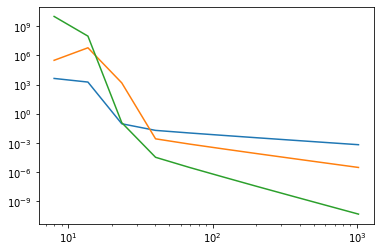

In [ ]:
#importing the required Libraries
import numpy as np
import matplotlib.pyplot as plt

#Defining Value of x and its range
x_0 = 0
x_m = 10.0

#Enter Value of k to run the loop till N = 2^k 
k = 10

# Exact Solution
def y_exact(x):
  return np.exp((-x**2)/2)

#defining the function dx/dy = -xy
def fxy(x, y):
  return -x*y
#------------------------------------------
#Creating Array to store value of y for all different type of Methods


error_euler = np.zeros(k)
error_rk2 = np.zeros(k)
error_rk4 = np.zeros(k)

n = np.logspace(3, k, k, endpoint=True, base=2)

for j in range(k):

  N = int(n[j])
  xv = np.linspace(x_0, x_m, N)
  h = xv[1] - xv[0]

  #------------------------------------------
 
  y_ana=np.exp((-xv**2)/2)


  y_euler = np.zeros(N)
  y_euler[0] = 1.0 

  y_rk2 = np.zeros(N)
  y_rk2[0] = 1.0

  y_rk4 = np.zeros(N)
  y_rk4[0] = 1.0
  #------------------------------------------

  for i in range(1, N):
    #for Euler Method
    y_euler[i] = y_euler[i-1] + h*fxy(y_euler[i-1], xv[i-1])

    #For Runge-Kutta 2nd Order
    k_1 = h*fxy(y_rk2[i-1], xv[i-1])
    k_2 = h*fxy(y_rk2[i-1]+ k_1, xv[i-1]+ h)
    y_rk2[i] = y_rk2[i-1] + (k_2 + k_1)/2

    #For Runge-Kutta 4th Order
    c_1 = h*fxy(y_rk4[i-1], xv[i-1])
    c_2 = h*fxy(y_rk4[i-1]+ c_1/2, xv[i-1]+ h/2)
    c_3 = h*fxy(y_rk4[i-1]+ c_2/2, xv[i-1]+ h/2)
    c_4 = h*fxy(y_rk4[i-1]+ c_3, xv[i-1]+ h)
    y_rk4[i] = y_rk4[i-1]+ 1/6*(c_1 + 2*c_2 + 2*c_3 + c_4)



  # Calculating and Printing RMS Error
  # print(len(y_ana))
  # print(len(y_euler))

  error_euler[j] = ((np.sum((y_ana - y_euler)**2))/N)**(1/2)
  # print(error_euler)
  error_rk2[j] = ((np.sum((y_ana - y_rk2)**2))/N)**(1/2)
  error_rk4[j] = ((np.sum((y_ana - y_rk4)**2))/N)**(1/2)

  # print(f'''RMS Error with N = {N} steps
  # -----------------------------------------------
  # Euler\'s method        :{error_euler}
  # Runge Kutta 2nd order :{error_rk2}
  # Runge Kutta 4th order :{error_rk4}
  # -----------------------------------------------
  # ''')

# print(error_euler)
# print(N, error_euler)
# print(error_euler)

plt.loglog(n,error_euler)
plt.loglog(n,error_rk2)
plt.loglog(n,error_rk4)
plt.show()

## 2.Stellar Orbits in Kepler Potential

The equation that governs the motion of a star in $r-\theta$ plane under a Kepler potential is given by

$$\frac{d^2u}{d\theta^2} + u = \frac{1}{a(1-e^2)}$$
where $u = 1/r, a$ and $e$ are constants.

Solve the above equation using values $a = 5.0$ and $e = 0.8$, plot the trajectory of the star with 

a) Euler Method
and 

b) Runge Kutta 2nd Order Method. 

Is the motion of the star what you expect i.e., a closed ellipse with eccentricity $e$ and semi-major axis $a$ ?. Justify the choices of initial conditions taken and any deviation from
the expected orbit.

**Hint:** The analytic solution between radius $r$ and $\theta$ for the above equation can be given as
$$r(\theta) = \frac{a(1-e^2)}{1+ e cos(\theta - \theta_0)}$$
where $\theta - \theta_0$ is called the true anomaly.

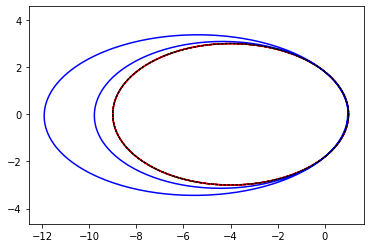

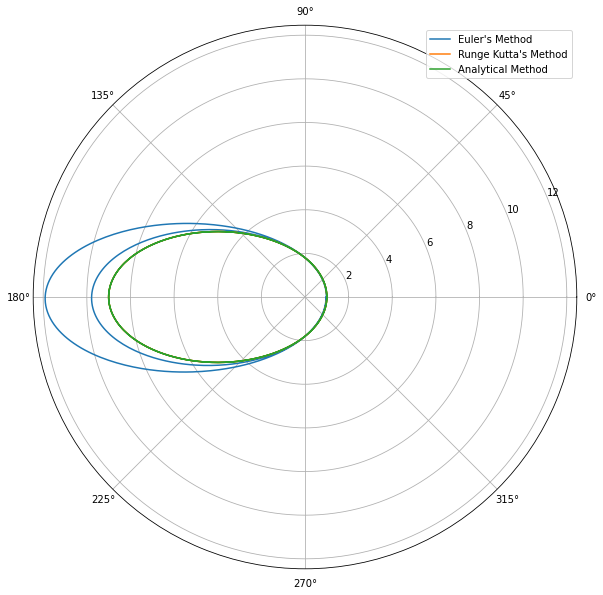

In [ ]:
# importing libraries required
import numpy as np
import matplotlib.pyplot as plt

#----------------
N = 1000
a = 5
e = 0.8
theta_0 = 0
u_0 = 1/(a*(1-e))

#Initialising the value of c_2
theta = np.linspace(theta_0, 4*np.pi + theta_0, N)
d_theta = theta[1] - theta[0]

# Assuming du/dtheta = v
v_eular = np.zeros(N)
v_rungekutta = np.zeros(N)


# Creating an array to store values of u 
u_eular = np.zeros(N)
u_eular[0] = u_0

u_rungekutta = np.zeros(N)
u_rungekutta[0] = u_0

# Breaking second order ODE into two coupled ODE
def DE_2(u):
  return -u + 1/(a*(1-e**2))

def DE_1(v):
  return v


for i in range(1, N):
  #for Euler's method
  v_eular[i] = v_eular[i-1] + d_theta * DE_2(u_eular[i-1])
  u_eular[i] = u_eular[i-1] + d_theta * DE_1(v_eular[i-1])

  # For Runge Kutta Method (2nd Order)
 
  k_1 = d_theta * DE_2(u_rungekutta[i-1])
  c_2 = d_theta * DE_1(v_rungekutta[i-1] + k_1/2)
  u_rungekutta[i] = u_rungekutta[i-1] + c_2

  c_1 = d_theta * DE_1(v_rungekutta[i-1])
  k_2 = d_theta * DE_2(u_rungekutta[i-1] + c_1/2)
  v_rungekutta[i] = v_rungekutta[i-1] + k_2
 


r_analytical = a*(1 - e**2)/ (1 + e*np.cos(theta - theta_0 ))
r_eular = u_eular**(-1)
r_rungekutta  = u_rungekutta**(-1)

#plots

#plotting the analytical solution
x_analytical, y_analytical = (np.cos(theta), np.sin(theta))*r_analytical
plt.plot(x_analytical, y_analytical, "r",label ='Analytical Method' )

#plotting the solution from Euler's Method
x_euler, y_euler = (np.cos(theta), np.sin(theta))*r_eular
plt.plot(x_euler, y_euler,"b", label ='Euler\'s Method')

#plotting the solution from Runge Kutta Second order
x_rungekutta, y_rungekutta = (np.cos(theta), np.sin(theta))*r_rungekutta
plt.plot(x_rungekutta, y_rungekutta,"k:", label ='Runge Kutta\'s Method')

plt.axis('equal')

#plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)

plt.axes(projection = 'polar')
plt.plot(theta, r_eular, label ="Euler's Method")
plt.plot(theta, r_rungekutta, label ="Runge Kutta's Method")
plt.plot(theta, r_analytical, label ="Analytical Method")

plt.legend()
plt.show()

## 3. Chandrashekar Mass Limit

Write the equations that govern the distribution of stellar mass $M(r)$ and $P(r)$ as a function of density $\rho(r)$
following the argument of hydrostatic balance. Using the following Equation of state, express the equations in
terms of variation of $M(r)$ and $\rho(r)$, where $r$ is the spherical radius.
$$P = \frac{1}{4} (3\pi^2)^{1/3}\hbar c(\frac{\alpha}{m_N})^{4/3} \rho^{4/3}$$
where, the parameter $\alpha$ is the number of electrons per nucleon in the star.

For numerical work it is useful to rescale the variables involved to that their actual numerical values are neither
too large nor too small. We therefore introduce : $\hat{r}, \hat{\rho}$ and $\hat{M}$ such that $r = R_0\hat{r},\rho =  \rho_0 \hat{\rho}$ and $M = M_0\hat{M}$. Where,
$$\rho_0 = \frac{n_0 m_N}{\alpha}$$
with $$n_0 = \frac{m^3_e c^3}{3\pi^2 \hbar^3}$$ and $$M_0 = 4\pi \rho_0 R_0^3$$ Using the above scaling relations, find the expression for $R_0$ such that the scaled equations become

$$\frac{d\hat{M}}{d\hat{r}} = \hat{r}^2\hat{\rho}$$
$$\frac{d\hat{\rho}}{d\hat{r}} = \frac{- \hat{M} \hat{\rho}^{2/3}}{\hat{r}^2}$$
Write a program to solve the above scaled equations using any algorithm of your choice. As discussed in class,
the idea is to numerically integrate these starting at $r = 0 + \epsilon$, (where $\epsilon$ is a small number) with the initial
conditions $\hat{M} = 0$ and $\hat{\rho} = \hat{\rho_c}$. The radius $R$ of the white dwarf is the value of $r$ at which $\rho = 0$, and $M(R)$ is the total mass at this point.

Once you have the code working, calculate the total masses and radii of white dwarfs with $\hat{\rho_c}$ values ranging from
about $0.1$ to $10^6$. This gives a family of equilibrium configurations. By changing the step-size $h$ and (maybe)
the algorithm used, verify that your solutions are accurate.

**Hint:** A useful way to display these results is as a plot of radius versus mass. Can you identify the point at
which the star can no longer be supported by degenerate electrons? This limiting mass for white dwarfs (with
$\alpha = 0.5$, 1 electron per 2 nucleons (1 proton + 1 neutron)) is known as the Chandrasekhar mass. Calculate its
value in units of the mass of the sun.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in double_scalars


Chandrasekhar Mass Limit is : 1.4417619844096223


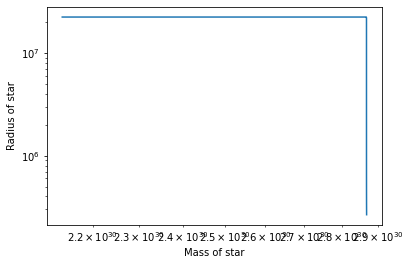

In [ ]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt


#Constants
N = 100000
alpha = 0.5

#Defining Comstants
M_sun = 1.989 * 10**30                                       #mass of sun
rho_0 = 1.962*10**9                                          #rho_0 as given above
R_0 = 2.23*10**6                                             #radius of sun
M_0 = 4*np.pi*rho_0*R_0**3                                   #M_0 defined as above
m_e = 9.1 * 10**(-31)                                        #mass of an electron
c = 3 * 10**8                                                #speed of light
h_cross = 1.054 * 10**(-34)                                  # Plankc's constant
G = 6.67*10**(-11)                                           # Gravitational constant
m_N = 1.69 * 10**(-27)                                       # mass of a neutron
n_0 = (m_e**3)*(c**3)/(3*np.pi**2 * h_cross**3)              #n_0 as given above
k = 1/4*((3*np.pi**2)**(1/3))*(h_cross*c)*(alpha/m_N)**(4/3) #P as above


# defining Functions
def mass_grad(M_cap, r_cap, rho_cap):
  return(r_cap**2)*rho_cap

def dens_grad(M_cap, r_cap, rho_cap):
  return -1*(M_cap*rho_cap**(2/3))/r_cap**2

r_cap=np.linspace(0.001, 10 + 0.001, N)

M_cap=np.zeros(N)
M_cap[0] = 0
rho_cap = np.zeros(N)

dr = r_cap[1] - r_cap[0]

k = 40

#Creating Array with values of rho_c so to loop and plot the graph
rho_c = np.logspace(-1, 6, k, endpoint=True, base=10)

r_max = np.zeros(k)
m_max = np.zeros(k)

for j in range(0, k):
    
    rho_cap[0] = rho_c[j]
   
    for i in range(1,N):

      #Solving the DE with Runge Kutta 2nd Error
      d_1 = dr*dens_grad(M_cap[i-1], r_cap[i-1], rho_cap[i-1])
      m_1 = dr*mass_grad(M_cap[i-1], r_cap[i-1], rho_cap[i-1])
      d_2 = dr*dens_grad(M_cap[i-1] + m_1/2, r_cap[i-1] + dr/2, rho_cap[i-1] + d_1/2)  
      m_2 = dr*mass_grad(M_cap[i-1] + m_1/2, r_cap[i-1] + dr/2, rho_cap[i-1] + d_1/2)

      M_cap[i] = M_cap[i-1] + m_2
      rho_cap[i] = rho_cap[i-1] + d_2


    flag = True

    '''we need to find the value of the total mass and this can be found by 
    finding out the index after which the density converges to zero'''

    for n in range(N):
        if np.isnan(rho_cap[n]) == True:
            r_max[j] = r_cap[n-1]
            m_max[j] = M_cap[n-1]
            flag = False
            break
    if flag:
        r_max[j] = r_cap[N-1]
        m_max[j] = M_cap[N-1]

#plotting
plt.loglog(m_max*M_0, r_max*R_0)
plt.ylabel("Radius of star")
plt.xlabel("Mass of star")
print(f'Chandrasekhar Mass Limit is : {m_max[k-1]*M_0/M_sun}')
